In [1]:
# 데이터의 타당성을 높이기 위해 주성분 분석을 실시한다.
# 데이터의 벡터간 scale을 맞추기 위해 정규화를 진행하고 시작한다.

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt # scree plot 그리기 위해 설치
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') # warning 메시지 제거

from sklearn.preprocessing import StandardScaler# 데이터 표준화 위해 설치
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA # PCA 하기 위해 설치

In [2]:
import matplotlib.pyplot as plt

# 한글 폰트 지정
plt.rc('font', family='AppleGothic') # 맥
# plt.rc('font', family='Malgun Gothic') # 윈도우

# 마이너스 값 깨지는 현상 해결
plt.rc('axes', unicode_minus=False)

# 레티나 디스플레이 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

In [3]:
# 사용할 파일 불러오기

tomato = pd.read_csv('/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/data/full_data_ver2.csv')
tomato

FileNotFoundError: [Errno 2] File /Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/data/full_data_ver2.csv does not exist: '/Users/jungdayoung/Documents/GitHub/Learning_Spoons_Second_Project/data/full_data_ver2.csv'

In [ ]:
# 원본 데이터 테스트/트레인 셋으로 나누기
tomato_1317 = tomato[tomato['일시'].str.contains('2013|2014|2015|2016|2017')]
tomato_1317.tail()
# 새로 만든 변수 데이터 프레임과 합치기 위해 인덱스를 리셋한 후 인덱스 컬럼 제거.
tomato_18 = tomato[tomato['일시'].str.contains('2018')].reset_index()
tomato_18 = tomato_18.drop('index', axis = 1)
tomato_18.head()

In [10]:
# 분석에 사용할 독립변수 컬럼 따로 빼기
tom_f = tomato.iloc[:,3:10]
tom_f

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,0.007216,0.770076,0.020583,0.018420,45.132576,31.543635,3.115385
1,0.006340,0.649199,0.013143,0.031923,44.532051,31.543635,3.800000
2,0.007477,0.713492,0.013913,0.030154,39.626984,31.543635,5.533333
3,0.005741,0.658125,0.008458,0.043541,38.334375,31.543635,4.600000
4,0.006363,0.739583,0.015653,0.017980,48.280093,31.543635,2.686667
...,...,...,...,...,...,...,...
32860,0.003241,0.502206,0.018193,0.023311,22.787681,12.066176,6.600000
32861,0.003150,0.475868,0.017313,0.022639,29.648866,19.518839,5.921429
32862,0.003204,0.605093,0.015468,0.027125,34.759259,22.728704,9.200000
32863,0.004119,0.373418,0.014718,0.027532,28.525591,15.960829,5.700000


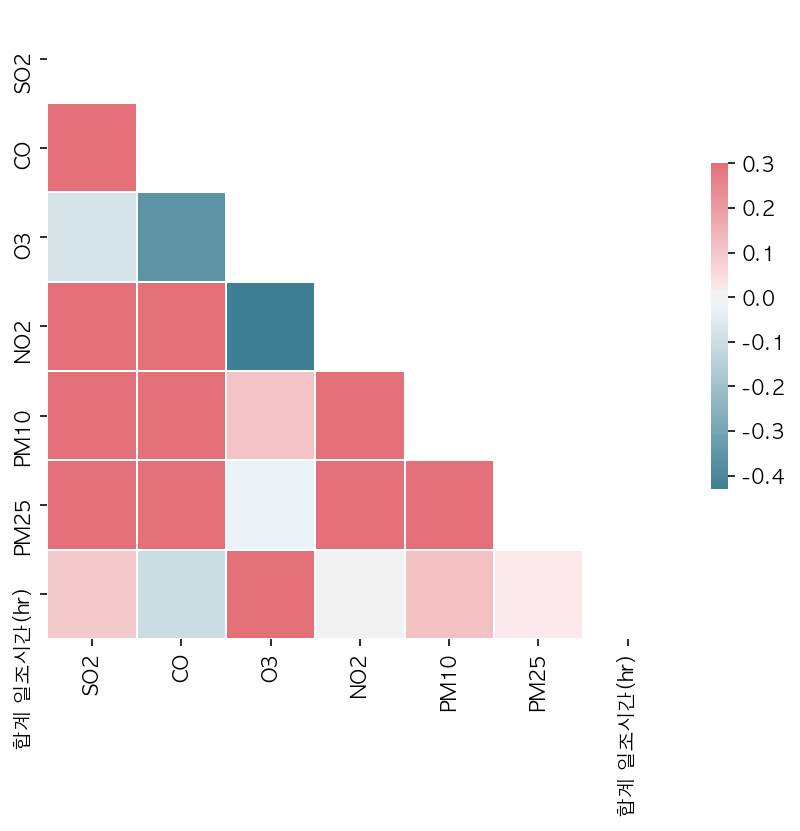

In [13]:
# 변수끼리의 상관관계 계산
corr = tom_f.corr()

# 삼각 행렬 모양으로 만들기
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# 컬러맵 지정
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# 상관관계 계수를 히트맵 그래프로 나타낸다.
plt.figure(figsize=(7,6))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [14]:
# 데이터의 스케일을 맞추기 위해 표준화 한다.

tomato_std = StandardScaler().fit_transform(tom_f)
# tomato_std = Normalizer().fit_transform(tom_f)
tomato_std = pd.DataFrame(tomato_std)
tomato_std.columns=['SO2','CO','O3','NO2','PM10','PM25','합계 일조시간(hr)']
tomato_std

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,1.401248,1.683266,-0.602959,-0.205503,0.009377,0.700892,-0.892847
1,0.960046,0.963638,-1.225475,1.128495,-0.016165,0.700892,-0.712974
2,1.532935,1.346401,-1.161088,0.953727,-0.224792,0.700892,-0.257563
3,0.657815,1.016780,-1.617452,2.276198,-0.279770,0.700892,-0.502784
4,0.971507,1.501733,-1.015496,-0.249008,0.143249,0.700892,-1.005487
...,...,...,...,...,...,...,...
32860,-0.602376,0.088533,-0.802986,0.277632,-0.941014,-1.275673,0.022689
32861,-0.647914,-0.068267,-0.876628,0.211309,-0.649189,-0.519380,-0.155597
32862,-0.620931,0.701057,-1.030991,0.654446,-0.431829,-0.193644,0.705804
32863,-0.159750,-0.678191,-1.093682,0.694647,-0.696965,-0.880445,-0.213774


In [15]:
# 테스트 데이터로 쓰일 2018 데이터 분리하기 위해 일시 컬럼과 병합
tom_f = pd.concat([tomato['일시'],tomato_std], axis = 1)
tom_f

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,2013-01-01,1.401248,1.683266,-0.602959,-0.205503,0.009377,0.700892,-0.892847
1,2013-01-01,0.960046,0.963638,-1.225475,1.128495,-0.016165,0.700892,-0.712974
2,2013-01-01,1.532935,1.346401,-1.161088,0.953727,-0.224792,0.700892,-0.257563
3,2013-01-01,0.657815,1.016780,-1.617452,2.276198,-0.279770,0.700892,-0.502784
4,2013-01-01,0.971507,1.501733,-1.015496,-0.249008,0.143249,0.700892,-1.005487
...,...,...,...,...,...,...,...,...
32860,2018-12-31,-0.602376,0.088533,-0.802986,0.277632,-0.941014,-1.275673,0.022689
32861,2018-12-31,-0.647914,-0.068267,-0.876628,0.211309,-0.649189,-0.519380,-0.155597
32862,2018-12-31,-0.620931,0.701057,-1.030991,0.654446,-0.431829,-0.193644,0.705804
32863,2018-12-31,-0.159750,-0.678191,-1.093682,0.694647,-0.696965,-0.880445,-0.213774


In [16]:
# 2013-2017 데이터 분리 
tom1317_std = tom_f[tom_f['일시'].str.contains('2013|2014|2015|2016|2017')]
tom1317_std.tail()

,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
27385,2017-12-31,-0.429577,1.267628,0.064437,-0.268910,1.057310,0.991101,0.600710
27386,2017-12-31,-0.525852,0.419524,0.153275,-0.680776,1.136562,0.709478,0.386767
27387,2017-12-31,-0.858957,0.676251,0.000547,-0.407066,1.488858,0.677201,-0.108679
27388,2017-12-31,-0.329508,-0.524316,0.082335,-0.620652,1.435827,1.377424,0.626983
27389,2017-12-31,-0.309564,0.824889,0.310185,-1.055616,0.784585,0.463126,-0.112433


In [17]:
# 일시 컬럼 제거
tom1317_std = tom1317_std.drop(['일시'],axis = 1)
tom1317_std.tail()

,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
27385,-0.429577,1.267628,0.064437,-0.268910,1.057310,0.991101,0.600710
27386,-0.525852,0.419524,0.153275,-0.680776,1.136562,0.709478,0.386767
27387,-0.858957,0.676251,0.000547,-0.407066,1.488858,0.677201,-0.108679
27388,-0.329508,-0.524316,0.082335,-0.620652,1.435827,1.377424,0.626983
27389,-0.309564,0.824889,0.310185,-1.055616,0.784585,0.463126,-0.112433


In [18]:
# 2018 데이터 분리 
tom18_std = tom_f[tom_f['일시'].str.contains('2018')].reset_index()
tom18_std.head()

,index,일시,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,27390,2018-01-01,-0.421940,0.771796,-0.422308,-0.618788,-0.514067,-0.051583,0.441191
1,27391,2018-01-01,0.570131,0.936106,-1.346957,0.968655,0.028755,0.074225,0.521889
2,27392,2018-01-01,1.024480,1.294119,-1.031267,0.792031,-0.318212,-0.379804,0.390520
3,27393,2018-01-01,0.700004,0.946419,-1.483939,1.544141,-0.012378,0.052017,0.469341
4,27394,2018-01-01,-0.373525,0.311708,-0.086629,-0.833008,-0.129348,0.149814,0.397527


In [19]:
# 일시 컬럼 제거
tom18_std = tom18_std.drop(['일시'],axis = 1)
tom18_std.head()

,index,SO2,CO,O3,NO2,PM10,PM25,합계 일조시간(hr)
0,27390,-0.421940,0.771796,-0.422308,-0.618788,-0.514067,-0.051583,0.441191
1,27391,0.570131,0.936106,-1.346957,0.968655,0.028755,0.074225,0.521889
2,27392,1.024480,1.294119,-1.031267,0.792031,-0.318212,-0.379804,0.390520
3,27393,0.700004,0.946419,-1.483939,1.544141,-0.012378,0.052017,0.469341
4,27394,-0.373525,0.311708,-0.086629,-0.833008,-0.129348,0.149814,0.397527


In [20]:
# 공분산 행렬 구하기
tom_cov = np.cov(tom1317_std.T)
tom_cov

array([[ 1.05860717,  0.54432982, -0.08488094,  0.53572707,  0.44808717,
         0.29005319,  0.09709745],
       [ 0.54432982,  1.03630054, -0.36604098,  0.68435518,  0.57001836,
         0.47134091, -0.10921655],
       [-0.08488094, -0.36604098,  1.00915627, -0.43310881,  0.1200282 ,
        -0.03235702,  0.36608173],
       [ 0.53572707,  0.68435518, -0.43310881,  1.00390196,  0.44323687,
         0.34483229, -0.00231107],
       [ 0.44808717,  0.57001836,  0.1200282 ,  0.44323687,  1.01881564,
         0.5027192 ,  0.11677702],
       [ 0.29005319,  0.47134091, -0.03235702,  0.34483229,  0.5027192 ,
         0.85718883,  0.01355031],
       [ 0.09709745, -0.10921655,  0.36608173, -0.00231107,  0.11677702,
         0.01355031,  0.99577668]])

In [21]:
# 고유값과 고유벡터 계산 (고유분해)
eig_vals, eig_vecs= np.linalg.eig(tom_cov)

In [22]:
# 고유값 확인
eig_vals

array([3.0349157 , 1.5215407 , 0.8231607 , 0.6127174 , 0.4163642 ,
       0.27542932, 0.29561905])

In [23]:
# 고유벡터 확인
eig_vecs

array([[ 0.42307491,  0.15050787, -0.36359097,  0.71451666,  0.34107407,
         0.19548846,  0.03279171],
       [ 0.51464904, -0.10563691,  0.06047942, -0.07379855, -0.15200634,
        -0.49691595,  0.66696465],
       [-0.19632987,  0.66715997,  0.26097699,  0.31516697, -0.0970757 ,
        -0.55756072, -0.16916055],
       [ 0.47594475, -0.14145811, -0.30629844, -0.18042065, -0.21760057,
        -0.33720495, -0.68267024],
       [ 0.41680908,  0.34690957,  0.36494544, -0.02071493, -0.53873384,
         0.53027292, -0.02976806],
       [ 0.34213192,  0.15951265,  0.46007726, -0.33971283,  0.71353068,
         0.01357247, -0.14531114],
       [-0.01706196,  0.59605777, -0.59779583, -0.48611107,  0.06654825,
         0.09436144,  0.19346173]])

In [24]:
# 주성분의 고유값 비율 확인
eig_vals_sum = np.sum(eig_vals)
for eig_val in eig_vals:
    print (str(eig_val/eig_vals_sum))

0.43481743183688876
0.21799367325454388
0.1179356062987747
0.08778504272381221
0.059653193105465914
0.03946121821228881
0.042353834568225716


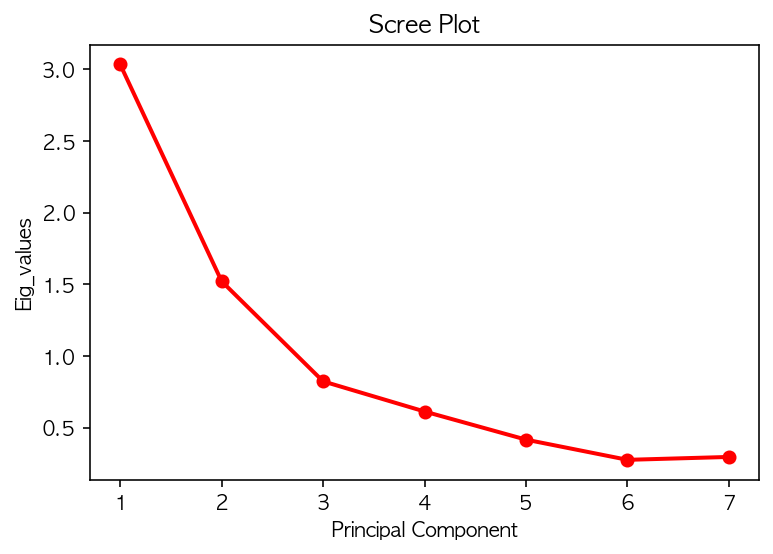

In [25]:
# 위 데이터를 이용해 scree plot 그려서 고유값 확인. 주성분 개수를 정할 때 한 눈에 볼 수 있어서 좋다.
sing_vals = np.arange(len(eig_vals))+1
plt.plot(sing_vals, eig_vals, "ro-", linewidth=2)
plt.title("Scree Plot")
plt.xlabel("Principal Component")
plt.ylabel("Eig_values")
plt.show()

In [26]:
# 주성분의 개수를 4개로 하여 주성분 분석
pca = PCA(n_components = 4)
pca

PCA(copy=True, iterated_power='auto', n_components=4, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [27]:
# 각 주성분 데이터들을 찾아서 array로 만든다.
pca_values = pca.fit_transform(tom1317_std)
pca_values

array([[ 1.65818988, -0.77042033,  0.35649334,  0.88404696],
       [ 1.84458547, -1.26647378, -0.21452546,  0.09812156],
       [ 2.09340057, -0.95392837, -0.67771819,  0.31397892],
       ...,
       [ 0.56445256,  0.40380321,  1.39687741, -0.83381205],
       [ 0.25777832,  1.2268879 ,  1.08155763, -0.89698906],
       [ 0.13719232,  0.48840653,  1.13230269, -0.14849381]])

In [28]:
# 고유값의 누적 설명력 확인. 80% 넘는것을 확인할 수 있다.
sum(pca.explained_variance_ratio_)

0.858531754114019

In [29]:
# 위에서 구한 주성분으로 이루어진 데이터 프레임 생성
pcadf = pd.DataFrame(data=pca_values, columns = ['PC1', 'PC2','PC3','PC4'])
pcadf

,PC1,PC2,PC3,PC4
0,1.658190,-0.770420,0.356493,0.884047
1,1.844585,-1.266474,-0.214525,0.098122
2,2.093401,-0.953928,-0.677718,0.313979
3,2.253810,-1.707601,-0.777111,-0.549072
4,1.500960,-1.105696,0.523619,0.520200
...,...,...,...,...
27385,1.019094,0.752238,0.813739,-1.017984
27386,0.268750,0.799919,0.974037,-0.723848
27387,0.564453,0.403803,1.396877,-0.833812
27388,0.257778,1.226888,1.081558,-0.896989


In [30]:
# 처음 데이터의 변수부분을 빼고 주성분 분석으로 구한 데이터 프레임과 합친다.
# 처음 데이터의 변수부분을 제외한 좌 우 데이터를 만든다.
tom_1 = tomato_1317.iloc[:,0:3]
tom_2 = tomato_1317.iloc[:,-4:]

In [31]:
# 데이터 병합 후 확인
tom_fin = pd.concat([tom_1,pcadf,tom_2],axis=1)
tom_fin

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2013-01-01,0,2013,1.658190,-0.770420,0.356493,0.884047,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-01,1,2013,1.844585,-1.266474,-0.214525,0.098122,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-01,2,2013,2.093401,-0.953928,-0.677718,0.313979,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-01,3,2013,2.253810,-1.707601,-0.777111,-0.549072,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-01,4,2013,1.500960,-1.105696,0.523619,0.520200,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...
27385,2017-12-31,10,2017,1.019094,0.752238,0.813739,-1.017984,토마토(10kg),울산광역시,엄궁도매,21000.0
27386,2017-12-31,11,2017,0.268750,0.799919,0.974037,-0.723848,토마토(10kg),경상남도,엄궁도매,21000.0
27387,2017-12-31,12,2017,0.564453,0.403803,1.396877,-0.833812,토마토(10kg),광주광역시,각화도매,21500.0
27388,2017-12-31,13,2017,0.257778,1.226888,1.081558,-0.896989,토마토(10kg),부산광역시,엄궁도매,21000.0


In [32]:
# 데이터 저장
tom_fin.to_csv('tom1317_fin.csv',encoding = 'cp949', index=False)

In [33]:
# 저장된 데이터 확인
pd.read_csv('tom1317_fin.csv', encoding = 'cp949')

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2013-01-01,0,2013,1.658190,-0.770420,0.356493,0.884047,토마토(10kg),강원도,가락도매,29000.0
1,2013-01-01,1,2013,1.844585,-1.266474,-0.214525,0.098122,토마토(10kg),경기도,가락도매,29000.0
2,2013-01-01,2,2013,2.093401,-0.953928,-0.677718,0.313979,토마토(10kg),인천광역시,가락도매,29000.0
3,2013-01-01,3,2013,2.253810,-1.707601,-0.777111,-0.549072,토마토(10kg),서울특별시,가락도매,29000.0
4,2013-01-01,4,2013,1.500960,-1.105696,0.523619,0.520200,토마토(10kg),경상북도,북부도매,29000.0
...,...,...,...,...,...,...,...,...,...,...,...
27385,2017-12-31,10,2017,1.019094,0.752238,0.813739,-1.017984,토마토(10kg),울산광역시,엄궁도매,21000.0
27386,2017-12-31,11,2017,0.268750,0.799919,0.974037,-0.723848,토마토(10kg),경상남도,엄궁도매,21000.0
27387,2017-12-31,12,2017,0.564453,0.403803,1.396877,-0.833812,토마토(10kg),광주광역시,각화도매,21500.0
27388,2017-12-31,13,2017,0.257778,1.226888,1.081558,-0.896989,토마토(10kg),부산광역시,엄궁도매,21000.0


In [34]:
# 18년도 테스트셋도 마찬가지로 pca 분석 실행
# 각 주성분 데이터들을 찾아서 array로 만든다.
pca_values18 = pca.fit_transform(tom18_std)
pca_values18

array([[-2.73699985e+03, -2.87189028e-01, -5.96709389e-01,
        -6.37110339e-01],
       [-2.73599987e+03,  1.10966461e+00, -1.27760427e+00,
        -1.74724237e+00],
       [-2.73499987e+03,  7.96281455e-01, -1.33381678e+00,
        -1.82522463e+00],
       ...,
       [ 2.73500007e+03,  1.07209167e+00, -9.79735797e-02,
        -9.55989133e-01],
       [ 2.73600026e+03,  6.04892823e-02, -7.28763883e-01,
        -6.65152528e-01],
       [ 2.73700000e+03,  4.78048456e-01,  1.15106972e-01,
        -8.11538049e-01]])

In [35]:
# 위에서 구한 주성분으로 이루어진 데이터 프레임 생성
pcadf18 = pd.DataFrame(data=pca_values18, columns = ['PC1', 'PC2','PC3','PC4'])
pcadf18

,PC1,PC2,PC3,PC4
0,-2736.999846,-0.287189,-0.596709,-0.637110
1,-2735.999866,1.109665,-1.277604,-1.747242
2,-2734.999867,0.796281,-1.333817,-1.825225
3,-2733.999849,1.376341,-1.524232,-2.024307
4,-2732.999954,-0.320868,-0.171794,-0.214173
...,...,...,...,...
5470,2733.000299,-0.282314,-0.577534,-0.691436
5471,2734.000183,0.224926,-0.486470,-0.235151
5472,2735.000073,1.072092,-0.097974,-0.955989
5473,2736.000264,0.060489,-0.728764,-0.665153


In [36]:
# 처음 데이터의 변수부분을 빼고 주성분 분석으로 구한 데이터 프레임과 합친다.
# 처음 데이터의 변수부분을 제외한 좌 우 데이터를 만든다.
tom_3 = tomato_18.iloc[:,0:3]
tom_4 = tomato_18.iloc[:,-4:]

In [37]:
# 데이터 병합 후 확인
tom_fin18 = pd.concat([tom_3,pcadf18,tom_4],axis=1, sort = False)
tom_fin18

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2018-01-01,0,2018,-2736.999846,-0.287189,-0.596709,-0.637110,토마토(10kg),강원도,가락도매,20000.0
1,2018-01-01,1,2018,-2735.999866,1.109665,-1.277604,-1.747242,토마토(10kg),경기도,가락도매,20000.0
2,2018-01-01,2,2018,-2734.999867,0.796281,-1.333817,-1.825225,토마토(10kg),인천광역시,가락도매,20000.0
3,2018-01-01,3,2018,-2733.999849,1.376341,-1.524232,-2.024307,토마토(10kg),서울특별시,가락도매,20000.0
4,2018-01-01,4,2018,-2732.999954,-0.320868,-0.171794,-0.214173,토마토(10kg),경상북도,북부도매,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
5470,2018-12-31,10,2018,2733.000299,-0.282314,-0.577534,-0.691436,토마토(10kg),울산광역시,엄궁도매,30000.0
5471,2018-12-31,11,2018,2734.000183,0.224926,-0.486470,-0.235151,토마토(10kg),경상남도,엄궁도매,30000.0
5472,2018-12-31,12,2018,2735.000073,1.072092,-0.097974,-0.955989,토마토(10kg),광주광역시,각화도매,31000.0
5473,2018-12-31,13,2018,2736.000264,0.060489,-0.728764,-0.665153,토마토(10kg),부산광역시,엄궁도매,30000.0


In [38]:
# 데이터 저장
tom_fin18.to_csv('tom18_fin.csv',encoding = 'cp949', index=False)

In [39]:
# 저장된 데이터 확인
pd.read_csv('tom18_fin.csv', encoding = 'cp949')

,일시,도_num,연도,PC1,PC2,PC3,PC4,품종명,도,마켓명,가격
0,2018-01-01,0,2018,-2736.999846,-0.287189,-0.596709,-0.637110,토마토(10kg),강원도,가락도매,20000.0
1,2018-01-01,1,2018,-2735.999866,1.109665,-1.277604,-1.747242,토마토(10kg),경기도,가락도매,20000.0
2,2018-01-01,2,2018,-2734.999867,0.796281,-1.333817,-1.825225,토마토(10kg),인천광역시,가락도매,20000.0
3,2018-01-01,3,2018,-2733.999849,1.376341,-1.524232,-2.024307,토마토(10kg),서울특별시,가락도매,20000.0
4,2018-01-01,4,2018,-2732.999954,-0.320868,-0.171794,-0.214173,토마토(10kg),경상북도,북부도매,25000.0
...,...,...,...,...,...,...,...,...,...,...,...
5470,2018-12-31,10,2018,2733.000299,-0.282314,-0.577534,-0.691436,토마토(10kg),울산광역시,엄궁도매,30000.0
5471,2018-12-31,11,2018,2734.000183,0.224926,-0.486470,-0.235151,토마토(10kg),경상남도,엄궁도매,30000.0
5472,2018-12-31,12,2018,2735.000073,1.072092,-0.097974,-0.955989,토마토(10kg),광주광역시,각화도매,31000.0
5473,2018-12-31,13,2018,2736.000264,0.060489,-0.728764,-0.665153,토마토(10kg),부산광역시,엄궁도매,30000.0
